In [1]:
import numpy as np
from data import *
from network import *
import matplotlib.pyplot as plt

In [2]:
import tqdm

In [118]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train_datas = load_data() #load train data
print(train_datas)

# retrieve binary data for labels 0 and 5
X=[]
Y=[]
for i in range(len(train_datas[0])):
    if i%10000 ==0:
        print(i) 
    if train_datas[1][i] == 0 or train_datas[1][i] == 5:
        X.append(train_datas[0][i])
        Y.append(train_datas[1][i])

X=np.array(X)
Y=np.array(Y)
train_datas = (X,Y)

#changing labels from 5 to 1
for i in range(len(Y)):
    if Y[i]==5:
        Y[i] =1

#normalized features
for i in range(len(X)):
    X[i] = z_score_normalize(X[i])[0]
    #X[i] = min_max_normalize(X[i])[0]

#shuffle datas
train_datas = shuffle(train_datas)

train_datas

(array([[ 61.33333333,  44.66666667,  47.        , ..., 180.        ,
        117.66666667,  95.66666667],
       [172.66666667, 133.        , 101.33333333, ..., 138.33333333,
        139.66666667, 140.        ],
       [255.        , 253.        , 253.        , ...,  82.        ,
         82.33333333,  83.33333333],
       ...,
       [149.33333333, 151.66666667, 153.        , ...,  52.        ,
         43.33333333,  31.        ],
       [213.33333333, 210.        , 209.        , ..., 182.66666667,
        185.33333333, 185.33333333],
       [232.33333333, 240.        , 239.        , ..., 176.33333333,
        163.33333333, 162.33333333]]), array([6, 9, 9, ..., 9, 1, 1]))
0
10000
20000
30000
40000


(array([[ 0.24129896,  0.25326845,  0.28917691, ...,  0.67220053,
          0.67220053,  0.67220053],
        [-1.39651864, -1.27345406, -1.1134701 , ..., -0.14125988,
         -0.17817925, -0.252018  ],
        [-1.25956268, -1.25956268, -1.25956268, ..., -0.03585093,
         -0.16434066, -0.29894896],
        ...,
        [ 0.34802365,  0.58285935,  0.73941648, ..., -0.97618876,
         -1.13274589, -1.29582624],
        [ 0.06837021,  0.06837021,  0.06837021, ...,  0.32181498,
          0.32181498,  0.32181498],
        [-0.78258628, -0.59319347, -0.561628  , ..., -0.174951  ,
         -0.1512769 , -0.37223518]]),
 array([0, 0, 1, ..., 0, 0, 0]))

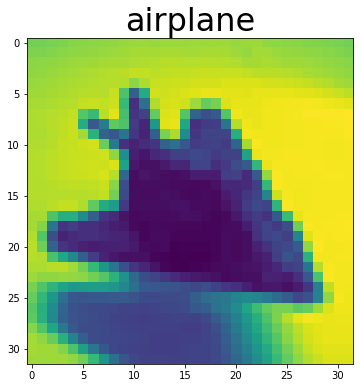

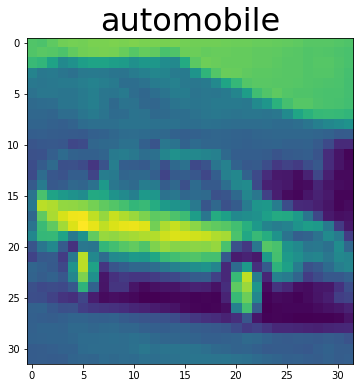

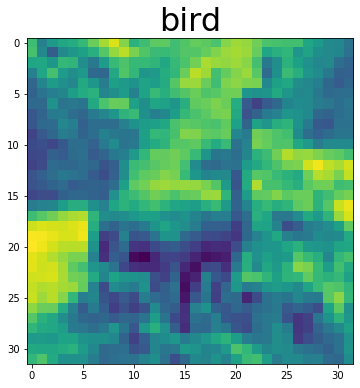

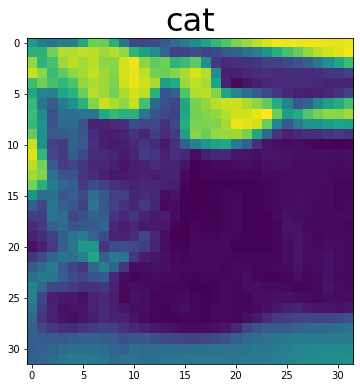

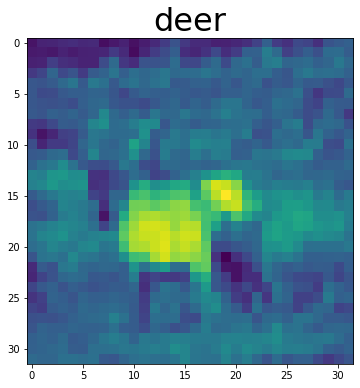

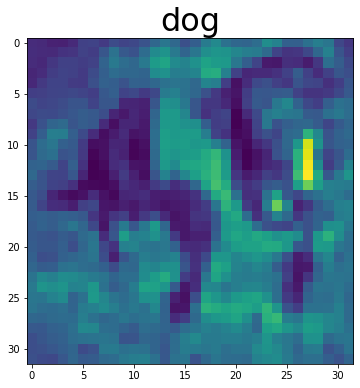

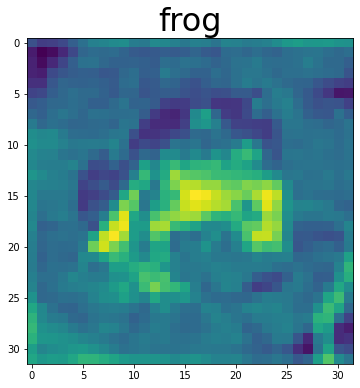

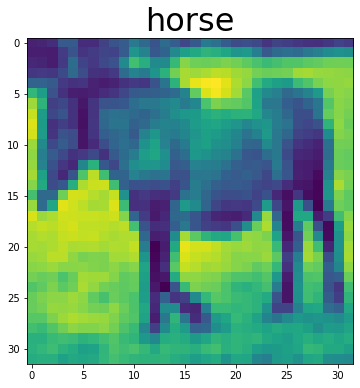

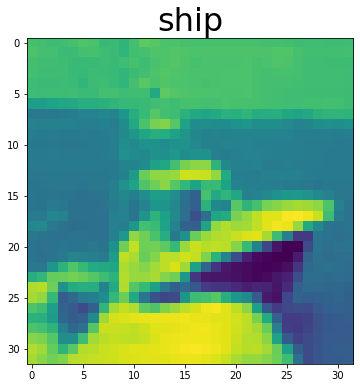

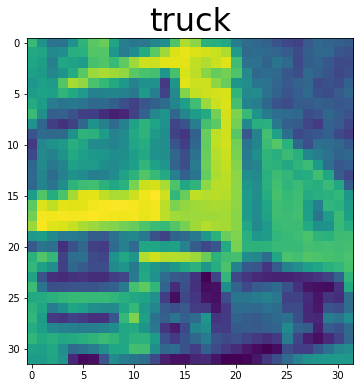

In [13]:
from cProfile import label


train_datas = load_data() #load train data
label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#train_datas[1]
for i in range(10):
    for j in range(5000):
        if(train_datas[1][j]==i):
            image = train_datas[0][j]
            image = np.array(image)
            image = image.reshape((32,32))
            # print(image.shape)
            plt.figure(figsize=(6,6))
            plt.imshow(image)
            # plt.title(f"the image of {i+1}th class",fontsize=32)
            plt.title(label[i],fontsize=32)
            # bbox_inches='tight'
            plt.savefig(f"{i+1}th class.png",bbox_inches = "tight")   
            plt.show()
            break
    #break

In [138]:
X = train_datas[0]
y=train_datas[1]


In [136]:
train_datas[1]

array([0, 1, 1, ..., 0, 0, 0])

In [60]:
len(train_datas[0])

10000

In [24]:
#k fold
folds = generate_k_fold_set(train_datas)
epochs = 100
batch_size = 64
val_loss = []# record validation loss for each model trained in each fold
val_accuracy=[]# record accuracy for each model trained in each fold
train_loss=[]#record train loss for each model trained in each fold
fold_epoch_loss={}#record all epoch losses stor in list for each fold
model = {}# store model trained in each fold
count =0
for i in folds:
    count+=1
    print(f"-----------------------------------------Begin Trainning for Fold {count}/10-----------------------------------------")
    val_set = i[1] # get validation set
    train_set = i[0] #get train set
    regressor = Network({'lr':0.1},activation=sigmoid,loss_func = binary_cross_entropy,out_dim=1)
    epoch_loss=[]
    
    best_weight = regressor.weights #to store best weight
    best_loss = np.inf # to store lowest loss
    for epoch in range(epochs):
        print(f'epoch: {epoch+1}/{epochs}')
        # generate batches
        batches = generate_minibatches(train_set)
        batch_loss=[]
        for batch in batches:
            X=batch[0]
            y=batch[1]
            #train the model, record loss for each batch
            batch_loss.append(regressor.train((X,y)))
        #record average loss of each batch for single epoch
        curr_epoch_loss = np.mean(batch_loss) #A
        epoch_loss.append(curr_epoch_loss) #A
        curr_weights = regressor.weights
        if curr_epoch_loss<=best_loss: # test if loss no longer decrease 
            # if loss keep decrease
            best_loss = curr_epoch_loss #update lowest loss value reached
            best_weight=curr_weights #store current weights
        else:
            # if loss no longer decrease
            regressor.weights=best_weight #reverse network weight to weight that produce lowest loss
            print(f'early stop, current loss{curr_epoch_loss}, last loss{best_loss}')
            break
        
        print(f"epoch loss:{np.mean(batch_loss)}")
    # record all losses for each epoch in this fold
    fold_epoch_loss[f'fold {count}'] = epoch_loss
    # record model
    model[f'fold {count} model'] = regressor
    # test on validation set
    val_result = regressor.test(val_set)
    # record validation loss
    val_loss.append(val_result['loss'])
    #record validation accuracy
    val_accuracy.append(val_result['accuracy'])
    #record average train loss for this fold
    train_loss.append(np.mean(epoch_loss))
    

-----------------------------------------Begin Trainning for Fold 1/10-----------------------------------------
epoch: 1/100
epoch loss:0.8802078221683806
epoch: 2/100
epoch loss:0.8604992877045944
epoch: 3/100
epoch loss:0.8479342221232057
epoch: 4/100
epoch loss:0.8387765350071362
epoch: 5/100
epoch loss:0.8312953596371665
epoch: 6/100
epoch loss:0.8251386598387314
epoch: 7/100
epoch loss:0.8201596932478833
epoch: 8/100
epoch loss:0.8161550107619508
epoch: 9/100
epoch loss:0.8129674219694859
epoch: 10/100
epoch loss:0.8103794750317536
epoch: 11/100
epoch loss:0.8081516120311932
epoch: 12/100
epoch loss:0.8061059481014905
epoch: 13/100
epoch loss:0.8041565118241875
epoch: 14/100
epoch loss:0.8022776237588902
epoch: 15/100
epoch loss:0.8004640617180604
epoch: 16/100
epoch loss:0.7987142713460176
epoch: 17/100
epoch loss:0.7970267643925314
epoch: 18/100
epoch loss:0.7953999106701113
epoch: 19/100
epoch loss:0.7938321334039843
epoch: 20/100
epoch loss:0.7923219852778693
epoch: 21/100
epo

#### Update: use validation set loss for early stop

In [ ]:
#k fold
folds = generate_k_fold_set(train_datas)
epochs = 100
batch_size = 64
val_loss = []# record validation loss for each model trained in each fold
val_accuracy=[]# record accuracy for each model trained in each fold
train_loss=[]#record train loss for each model trained in each fold
fold_epoch_loss={}#record all epoch losses stor in list for each fold
model = {}# store model trained in each fold
count =0
for i in folds:
    count+=1
    print(f"-----------------------------------------Begin Trainning for Fold {count}/10-----------------------------------------")
    val_set = i[1] # get validation set
    train_set = i[0] #get train set
    regressor = Network({'lr':0.0001},activation=sigmoid,loss_func = binary_cross_entropy,out_dim=1)
    epoch_loss=[]
    
    best_weight = regressor.weights #to store best weight
    best_val_loss = np.inf # to store lowest loss
    best_val_acc=0 # to store final acc
    
    for epoch in range(epochs):
        print(f'epoch: {epoch+1}/{epochs}')
        # generate batches
        batches = generate_minibatches(train_set)
        batch_loss=[]
        for batch in batches:
            X=batch[0]
            y=batch[1]
            #train the model, record loss for each batch
            batch_loss.append(regressor.train((X,y)))
        #record average training loss of each batch for single epoch
        curr_epoch_loss = np.mean(batch_loss)
        print(f"epoch loss:{np.mean(batch_loss)}")
        epoch_loss.append(curr_epoch_loss) 
        curr_weights = regressor.weights
        
        #performance on validation dataset (fold):
        val_set_loss_acc=regressor.test(val_set)
        curr_epoch_val_loss = val_set_loss_acc['loss']
        curr_epoch_val_acc = val_set_loss_acc['accuracy']
        
        # -- EARLY STOP -- use validation set result to decide early stop
        if curr_epoch_val_loss<=best_val_loss: # test if loss no longer decrease 
            # if loss keep decrease
            best_val_loss = curr_epoch_val_loss #update lowest loss value reached
            best_val_acc=curr_epoch_val_acc
            best_weight=curr_weights #store current weights
        else:
            # if loss no longer decrease
            regressor.weights=best_weight #reverse network weight to weight that produce lowest loss
            print(f'early stop, current val loss{curr_epoch_val_loss}, last val loss{best_val_loss}')
            print(f'early stop, current val accuracy{curr_epoch_val_acc}, last val accuracy{best_val_acc}')
            break
        
        
        
    # record all losses for each epoch in this fold
    fold_epoch_loss[f'fold {count}'] = epoch_loss
    # record model
    model[f'fold {count} model'] = regressor
    # test on validation set
    val_result = regressor.test(val_set)
    # record validation loss
    val_loss.append(val_result['loss'])
    #record validation accuracy
    val_accuracy.append(val_result['accuracy'])
    #record average train loss for this fold
    train_loss.append(np.mean(epoch_loss))
    

-----------------------------------------Begin Trainning for Fold 1/10-----------------------------------------
epoch: 1/100
epoch loss:0.655735608501606
epoch: 2/100
epoch loss:0.6146604115773187
epoch: 3/100
epoch loss:0.5982201192012649
epoch: 4/100
epoch loss:0.5905787515042323
epoch: 5/100
epoch loss:0.5864569098052504
epoch: 6/100
epoch loss:0.5838999082136994
epoch: 7/100
epoch loss:0.5821127493385502
epoch: 8/100
epoch loss:0.5807454675899615
epoch: 9/100
epoch loss:0.5796323224847596
epoch: 10/100
epoch loss:0.5786886611770995
epoch: 11/100
epoch loss:0.5778675342509676
epoch: 12/100
epoch loss:0.5771405307324984
epoch: 13/100
epoch loss:0.5764889453635186
epoch: 14/100
epoch loss:0.5758995336555471
epoch: 15/100
epoch loss:0.5753623736287704
epoch: 16/100
epoch loss:0.5748697263091177
epoch: 17/100
epoch loss:0.574415386590338
epoch: 18/100
epoch loss:0.5739942853192077
epoch: 19/100
epoch loss:0.5736022271319746
epoch: 20/100
epoch loss:0.5732357064998502
epoch: 21/100
epoch

In [57]:
val_accuracy,np.mean(val_accuracy)

([0.713, 0.6915, 0.706, 0.7015, 0.6995], 0.7023)

In [ ]:
plt.figure(figsize=(30,10))
fig, ax=plt.subplots(10)
fig.set_figheight(40)
fig.set_figwidth(5)
count = 0
for i in fold_epoch_loss:
    ax[count].plot(fold_epoch_loss[i])
    count+=1
fig.tight_layout()

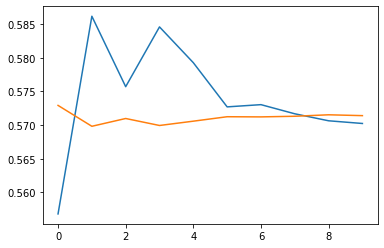

In [113]:
plt.plot(val_loss)
plt.plot(train_loss)

In [115]:
np.max(val_accuracy)

0.714

In [28]:
np.mean(val_accuracy),np.mean(val_loss)

(0.6607999999999999, 0.8599670972014835)

In [12]:
input = np.random.rand(1,1024)
weights = np.random.rand(1024,10)

In [14]:
input @ weights

array([[239.72457533, 247.98861132, 254.59936098, 249.31681626,
        251.84617817, 248.67948779, 252.7236368 , 242.53527336,
        244.45519753, 245.85221619]])